In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

169009152/169001437 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
x_mean = np.mean(x_train, axis=(0,1,2))
x_std = np.std(x_train, axis=(0,1,2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         7

In [ ]:
history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/15
1094/1094 [==============================] - 7s 6ms/step - loss: 4.0634 - acc: 0.0881 - val_loss: 3.6915 - val_acc: 0.1411
Epoch 2/15
1094/1094 [==============================] - 6s 6ms/step - loss: 3.4994 - acc: 0.1807 - val_loss: 3.3640 - val_acc: 0.2021
Epoch 3/15
1094/1094 [==============================] - 6s 6ms/step - loss: 3.1751 - acc: 0.2384 - val_loss: 3.1724 - val_acc: 0.2408
Epoch 4/15
1094/1094 [==============================] - 6s 6ms/step - loss: 2.9263 - acc: 0.2822 - val_loss: 3.0026 - val_acc: 0.2701
Epoch 5/15
1094/1094 [==============================] - 6s 6ms/step - loss: 2.7133 - acc: 0.3268 - val_loss: 2.9053 - val_acc: 0.2937
Epoch 6/15
1094/1094 [==============================] - 6s 6ms/step - loss: 2.5230 - acc: 0.3649 - val_loss: 2.8142 - val_acc: 0.3139
Epoch 7/15
1094/1094 [==============================] - 6s 6ms/step - loss: 2.3460 - acc: 0.4027 - val_loss: 2.7723 - val_acc: 0.3249
Epoch 8/15
1094/1094 [==============================] - 6s 6ms

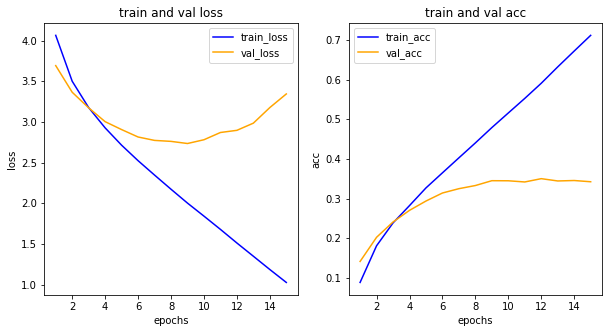

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10,5))

#학습 및 검증 손실
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc = his_dict['val_acc']

#학습 및 검증 정확도
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel("epochs")
ax2.set_ylabel("acc")
ax2.legend()

plt.show()

# 모델2

In [ ]:
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)))
model2.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
model2.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model2.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu'))
model2.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model2.add(Conv2D(filters=256, kernel_size=3,padding='same',activation='relu'))
model2.add(Conv2D(filters=256, kernel_size=3,padding='same',activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(100, activation='softmax'))

model2.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model2.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.2407 - acc: 0.9223 - val_loss: 5.6953 - val_acc: 0.3073
Epoch 2/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.2114 - acc: 0.9332 - val_loss: 6.0321 - val_acc: 0.3071
Epoch 3/30
1094/1094 [==============================] - 8s 8ms/step - loss: 0.2089 - acc: 0.9337 - val_loss: 6.1154 - val_acc: 0.2992
Epoch 4/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.1786 - acc: 0.9435 - val_loss: 6.2320 - val_acc: 0.3074
Epoch 5/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.1754 - acc: 0.9435 - val_loss: 6.2428 - val_acc: 0.3099
Epoch 6/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.1593 - acc: 0.9491 - val_loss: 6.4701 - val_acc: 0.3048
Epoch 7/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.1559 - acc: 0.9505 - val_loss: 6.1482 - val_acc: 0.3081
Epoch 8/30
1094/1094 [==============================] - 8s 7ms

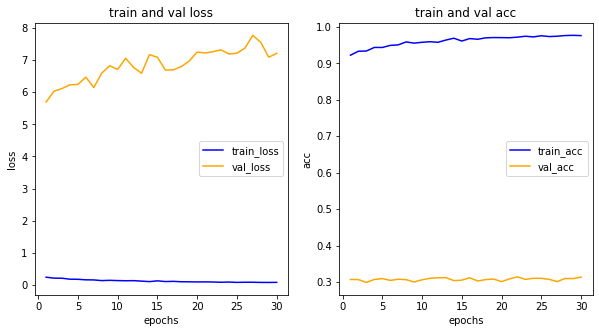

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10,5))

#학습 및 검증 손실
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc = his_dict['val_acc']

#학습 및 검증 정확도
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel("epochs")
ax2.set_ylabel("acc")
ax2.legend()

plt.show()


# 2번

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications import ResNet50

# imagenet을 학습한 모델을 불러옵니다.
resnet = ResNet50(weights = 'imagenet', input_shape = (32, 32, 3), include_top = False)
resnet.summary()

94773248/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
__________________________

In [5]:
model = Sequential()
model.add(resnet)
# 분류기를 직접 정의합니다.
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(100, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [7]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 112s 102ms/step - loss: 3.2736 - acc: 0.2469 - val_loss: 2.5156 - val_acc: 0.3799
Epoch 2/30
1094/1094 [==============================] - 110s 100ms/step - loss: 2.2808 - acc: 0.4247 - val_loss: 2.1382 - val_acc: 0.4550
Epoch 3/30
1094/1094 [==============================] - 109s 100ms/step - loss: 1.8292 - acc: 0.5236 - val_loss: 1.9949 - val_acc: 0.4897
Epoch 4/30
1094/1094 [==============================] - 109s 100ms/step - loss: 1.4838 - acc: 0.6000 - val_loss: 1.8933 - val_acc: 0.5051
Epoch 5/30
1094/1094 [==============================] - 110s 101ms/step - loss: 1.1981 - acc: 0.6718 - val_loss: 1.9195 - val_acc: 0.5184
Epoch 6/30
1094/1094 [==============================] - 110s 101ms/step - loss: 0.9309 - acc: 0.7391 - val_loss: 1.9934 - val_acc: 0.5058
Epoch 7/30
1094/1094 [==============================] - 109s 100ms/step - loss: 0.7408 - acc: 0.7911 - val_loss: 2.0088 - val_acc: 0.5188
Epoch 8/30
1094/1094 [============

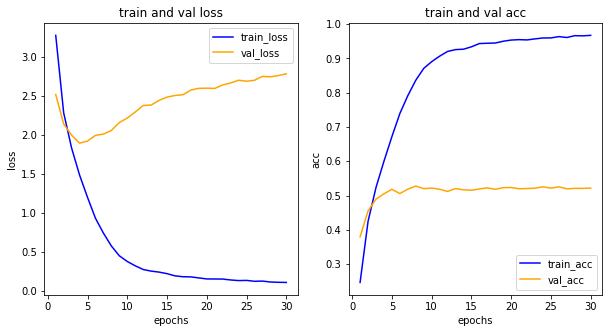

In [8]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10,5))

#학습 및 검증 손실
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc = his_dict['val_acc']

#학습 및 검증 정확도
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel("epochs")
ax2.set_ylabel("acc")
ax2.legend()

plt.show()